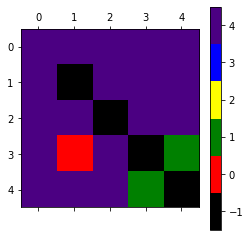

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import heapq

#-1 -> blocked, 0 -> start, 1 -> goal, 2 -> explored, 3 -> frontier, 4 -> unvisited (normal state)

my_cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'indigo'])
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
my_norm = colors.BoundaryNorm(bounds, my_cmap.N)

def generate_grid(n, blocks, start, goals):
    grid = [[4 for i in range(n)] for j in range(n)]
    x, y = start
    grid[x][y] = 0
    for block in blocks:
      x, y = block
      grid[x][y] = -1
    for goal in goals:
      x, y = goal
      grid[x][y] = 1
    return grid

def grid_display(grid):
  n = len(grid)
  img = np.array(grid)
  plt.matshow(img, cmap = my_cmap, norm = my_norm)
  plt.colorbar(cmap = my_cmap, norm = my_norm, boundaries = bounds, ticks = [-1, 0, 1, 2, 3, 4])
  plt.show()

grid = generate_grid(5, [[1, 1], [2, 2], [3, 3], [4, 4]], [3, 1], [[4, 3], [3, 4]])
grid_display(grid)

In [14]:
dir = [0, 1, 0, -1]

#Use toggle 1 for BFS, and -1 for DFS
def graph_search(grid, source, goals, toggle):

  n = len(grid)
  vis = [[0 for i in range(n)] for j in range(n)]
  pre = [[[-1, -1] for i in range(n)] for j in range(n)]

  if (toggle == 1):
     print('Performing a breadth first search...') 
  else:
     print('Performing a depth first search...')

  print('Displaying the grid before the search starts...')
  grid_display(grid)

  pq = []
  x, y = source
  heapq.heappush(pq, [0, x, y])
  vis[x][y] = 1
  counter = 1
  
  goal = 0
  #algorithm execution
  while (len(pq) and goal == 0):
    l = heapq.heappop(pq)
    c, x, y = l
    if (grid[x][y] == 3):
      grid[x][y] = 2
    for i in range(4):
      new_x = x + dir[(i + 0) % 4]
      new_y = y + dir[(i + 1) % 4]
      if (new_x >= 0 and new_x < n):
        if (new_y >= 0 and new_y < n):
          if (vis[new_x][new_y] == 0 and grid[new_x][new_y] != -1):
            pre[new_x][new_y] = [x, y]
            vis[new_x][new_y] = 1
            if (grid[new_x][new_y] != 1):
              grid[new_x][new_y] = 3
            else:
              goal = 1
              break
            heapq.heappush(pq, [toggle * counter, new_x, new_y])
            counter += 1
    grid_display(grid)
  
  #finding paths to the goals
  for i in range(len(goals)):
    path = []
    curr = goals[i]
    while (curr != [-1, -1]):
      path.append(curr)
      x, y = curr
      curr = pre[x][y]
    if (path[-1] == source):
      path.reverse()
      print('Path discovered from ', source, 'to ', goals[i], ': ')
      print(*path, sep = " -> ")
    #else:
      #print('No path to the goal ', goals[i], ' exists from the given starting point.')

Enter the value of n.
5
Enter the number of blocks, followed by the co-ords of the blocked locations.
4
1 1
2 2
3 3
4 4
Enter the starting position.
1 3
Enter the number of goals, followed by the co-ords of the goal locations.
2
3 4
4 3
Enter 1 to perform a BFS, or -1 to perform a DFS
1
Performing a breadth first search...
Displaying the grid before the search starts...


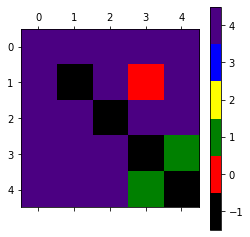

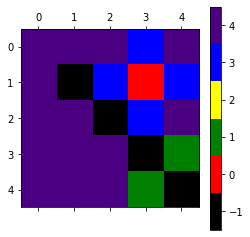

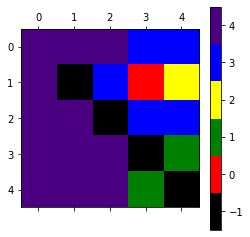

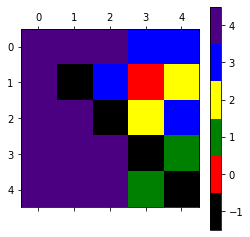

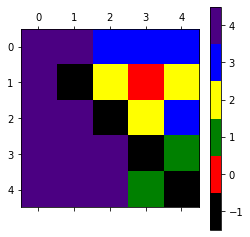

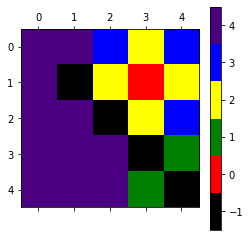

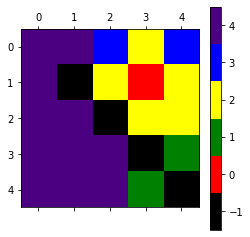

Path discovered from  [1, 3] to  [3, 4] : 
[1, 3] -> [1, 4] -> [2, 4] -> [3, 4]


In [15]:
#1 and 2 (two birds with one stone!)
print('Enter the value of n.')
n = int(input())

print('Enter the number of blocks, followed by the co-ords of the blocked locations.')
blocks = []
b = int(input())
for i in range(b):
  x, y = map(int, input().split())
  blocks.append([x, y])

print('Enter the starting position.')
x, y = map(int, input().split())
start = [x, y]

print('Enter the number of goals, followed by the co-ords of the goal locations.')
goals = []
g = int(input())
for i in range(g):
  x, y = map(int, input().split())
  goals.append([x, y])

grid = generate_grid(n, blocks, start, goals)

print('Enter 1 to perform a BFS, or -1 to perform a DFS')
toggle = int(input())

graph_search(grid, start, goals, toggle)

In [5]:
#3
state = {}
state_number = {}

state_cnt = 1

#Hashing the possible grid states as strings
def label_state(puzzle):
  s = ''
  for i in range(9):
    s += puzzle[i]
  if (s not in state_number):
    global state_cnt
    state_number[s] = state_cnt
    state[state_cnt] = s
    state_cnt += 1

def brute_force(puzzle, l, r):
  if (l == r):
    label_state(puzzle)
  else:
    i = l
    while (i <= r):
      puzzle[i], puzzle[l] = puzzle[l], puzzle[i]
      brute_force(puzzle, l + 1, r)
      puzzle[i], puzzle[l] = puzzle[l], puzzle[i]
      i += 1

def string_to_grid(puzzle):
  grid = [['0' for i in range(3)] for j in range(3)]
  cnt = 0
  for i in range(3):
    for j in range(3):
      grid[i][j] = puzzle[cnt]
      cnt += 1
  return grid

def grid_to_string(grid):
  s = ''
  for i in range(3):
    for j in range(3):
      s += grid[i][j]
  return s

brute_force(['1', '2', '3', '4', '5', '6', '7', 's', 's'], 0, 8)
state_cnt -= 1
print('Number of possible states: ', state_cnt)

Number of possible states:  181440


In [6]:
where = ['RIGHT', 'DOWN', 'LEFT', 'UP']

vis = [0 for i in range(181445)]
pre = [0 for i in range(181445)]
mov = [[-1, -1] for i in range(181445)]
act = [-1 for i in range(181445)]

def bfs(source):
  pq = []
  counter = 1
  heapq.heappush(pq, [0, state_number[source]])
  vis[state_number[source]] = 1

  while (len(pq)):
    popped_pos = heapq.heappop(pq)
    c, curr = popped_pos
    grid = string_to_grid(state[curr])
    free_spaces = []
    for i in range(3):
      for j in range(3):
        if (grid[i][j] == 's'):
          free_spaces.append([i, j])
    for i in range(2):
      x_prev, y_prev = free_spaces[i]
      for j in range(4):
        x = x_prev + dir[(j + 0) % 4]
        y = y_prev + dir[(j + 1) % 4]
        if (x >= 0 and x < 3):
          if (y >= 0 and y < 3):
            if (grid[x][y] != 's'):
              new_grid = [[grid[i][j] for j in range(3)] for i in range(3)]
              new_grid[x_prev][y_prev], new_grid[x][y] = new_grid[x][y], new_grid[x_prev][y_prev]
              s = grid_to_string(new_grid)
              if (vis[state_number[s]] == 0):
                pre[state_number[s]] = curr
                mov[state_number[s]] = [x_prev, y_prev]
                act[state_number[s]] = j
                vis[state_number[s]] = 1
                heapq.heappush(pq, [counter, state_number[s]])
                counter += 1                                                                                                          

grid = [['0' for i in range(3)] for j in range(3)]
print('Enter the final (goal) state: ')
for i in range(3):
  grid[i][0], grid[i][1], grid[i][2] = input().split()

print('Performing BFS...')
bfs(grid_to_string(grid))
print('Done!')

Enter the final (goal) state: 
1 2 3
4 5 6
7 s s
Performing BFS...
Done!


In [7]:
def path_to_goal(starting_grid):
  num = state_number[grid_to_string(starting_grid)]
  if (vis[num] == 0):
    print('No path exists from this configuration to the final state.') #This condition is most probably useless.
  else:
    print('Computing the path to the goal state...')
    path = []
    while (num != 0):
      path.append(num)
      num = pre[num]
    print('Move count of computed solution = ', len(path) - 1)
    if (len(path) == 1):
      print('We have already reached the end state.')
    for i in range(len(path)):
      grid = string_to_grid(state[path[i]])
      for j in range(3):
        print(grid[j])
      if (i != len(path) - 1):
        print('Move the piece at', mov[path[i]], where[act[path[i]]])

starting_grid = [['0' for i in range(3)] for j in range(3)]
print('Enter your starting state: ')
for i in range(3):
  starting_grid[i][0], starting_grid[i][1], starting_grid[i][2] = input().split()

path_to_goal(starting_grid)

Enter your starting state: 
2 6 s
4 3 7
5 s 1
Computing the path to the goal state...
Move count of computed solution =  16
['2', '6', 's']
['4', '3', '7']
['5', 's', '1']
Move the piece at [2, 2] LEFT
['2', '6', 's']
['4', '3', '7']
['5', '1', 's']
Move the piece at [0, 1] RIGHT
['2', 's', '6']
['4', '3', '7']
['5', '1', 's']
Move the piece at [1, 1] UP
['2', '3', '6']
['4', 's', '7']
['5', '1', 's']
Move the piece at [2, 1] UP
['2', '3', '6']
['4', '1', '7']
['5', 's', 's']
Move the piece at [2, 0] RIGHT
['2', '3', '6']
['4', '1', '7']
['s', '5', 's']
Move the piece at [1, 0] DOWN
['2', '3', '6']
['s', '1', '7']
['4', '5', 's']
Move the piece at [1, 1] LEFT
['2', '3', '6']
['1', 's', '7']
['4', '5', 's']
Move the piece at [2, 1] UP
['2', '3', '6']
['1', '5', '7']
['4', 's', 's']
Move the piece at [1, 2] DOWN
['2', '3', '6']
['1', '5', 's']
['4', 's', '7']
Move the piece at [2, 2] LEFT
['2', '3', '6']
['1', '5', 's']
['4', '7', 's']
Move the piece at [0, 2] DOWN
['2', '3', 's']
['1', 